In [ ]:
# 필요한 라이브러리 로드
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
#데이터 로드
df=pd.read_csv('data.csv',encoding='cp949')

In [ ]:
# 데이터 전처리
df['날짜'] = pd.to_datetime(df['시간'])
df['요일'] = df['날짜'].dt.dayofweek
df['시간'] = pd.to_datetime(df['시간']).dt.hour
df['시간_sin'] = np.sin(2 * np.pi * df['시간'] / 24)
df['시간_cos'] = np.cos(2 * np.pi * df['시간'] / 24)
df['요일_sin'] = np.sin(2 * np.pi * df['요일'] / 7)
df['요일_cos'] = np.cos(2 * np.pi * df['요일'] / 7)

categorical_col = '호선 역번호 역명 상하구분'.split()
int_col = 'AWS지점코드 시간'.split()

df[categorical_col] = df[categorical_col].astype('category')
df[int_col] = df[int_col].astype('int32')

In [ ]:
# 결측치 처리
#-99를 결측치라고 판단-> nan으로 변경
for col in '기온 풍향 풍속 일강수량 시간강수량 상대습도 일사량 체감온도'.split():
    df[col] = df[col].replace(-99, np.nan)

In [ ]:
cond = df['시간'].isin([21, 22, 23, 0, 1, 5])
df.loc[cond, '일사량']=0

In [ ]:
columns_to_fill = ['기온', '풍향', '풍속', '일강수량', '시간강수량', '상대습도', '일사량', '체감온도']
df[columns_to_fill] = df[columns_to_fill].interpolate(method='linear', limit_direction='both')
df.isna().sum()

,0
시간,0
호선,0
역번호,0
역명,0
상하구분,0
AWS지점코드,0
기온,0
풍향,0
풍속,0
일강수량,0


In [ ]:
for i in ['기온','풍향','풍속','일강수량','상대습도','일사량','체감온도','혼잡도','승차총승객수','하차총승객수','미세먼지']:
  df_grouped=df.groupby('날짜')[i].mean()
  df_grouped.plot(figsize=(12, 4), title=f'날짜별 평균 {i}')
  plt.show()

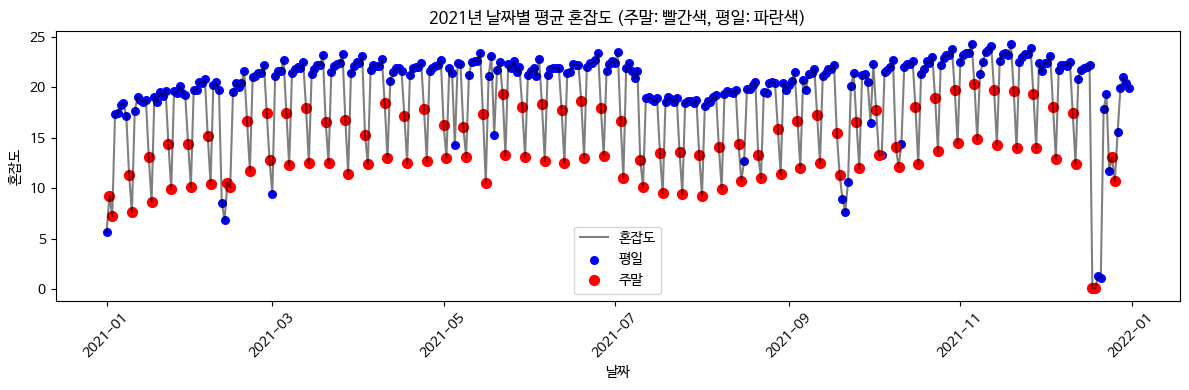

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df['날짜'] = pd.to_datetime(df['날짜'])
df_2021 = df[df['날짜'].dt.year == 2021]
daily_mean = df_2021.groupby(df_2021['날짜'].dt.date)['혼잡도'].mean().reset_index()
daily_mean.columns = ['날짜', '혼잡도']
daily_mean['요일'] = pd.to_datetime(daily_mean['날짜']).dt.weekday
is_weekend = daily_mean['요일'] >= 5

plt.figure(figsize=(12,4))
plt.plot(daily_mean['날짜'], daily_mean['혼잡도'], color='black', linestyle='-', alpha=0.5, label='혼잡도')
plt.scatter(daily_mean.loc[~is_weekend, '날짜'],
            daily_mean.loc[~is_weekend, '혼잡도'],
            color='blue', label='평일', s=30)
plt.scatter(daily_mean.loc[is_weekend, '날짜'],
            daily_mean.loc[is_weekend, '혼잡도'],
            color='red', label='주말', s=50)

plt.title('2021년 날짜별 평균 혼잡도 (주말: 빨간색, 평일: 파란색)')
plt.xlabel('날짜')
plt.ylabel('혼잡도')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

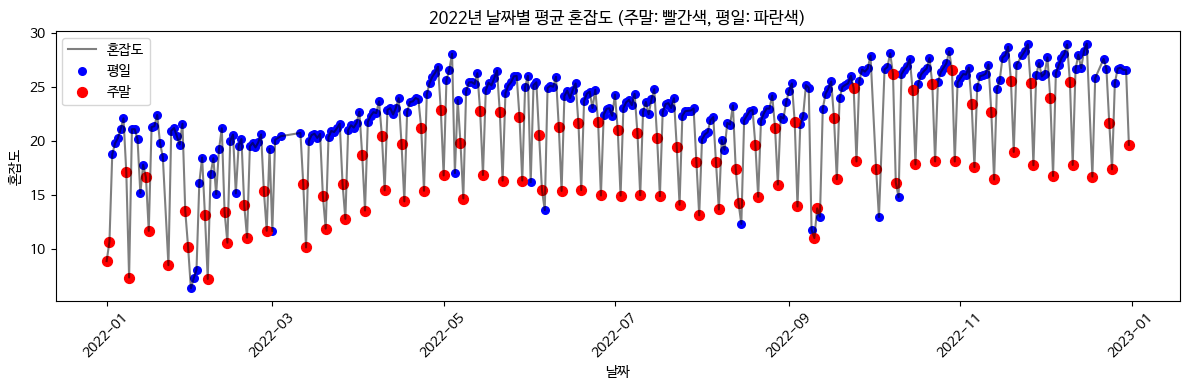

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df['날짜'] = pd.to_datetime(df['날짜'])
df_2022 = df[df['날짜'].dt.year == 2022]
daily_mean = df_2022.groupby(df_2022['날짜'].dt.date)['혼잡도'].mean().reset_index()
daily_mean.columns = ['날짜', '혼잡도']
daily_mean['요일'] = pd.to_datetime(daily_mean['날짜']).dt.weekday
is_weekend = daily_mean['요일'] >= 5

plt.figure(figsize=(12,4))
plt.plot(daily_mean['날짜'], daily_mean['혼잡도'], color='black', linestyle='-', alpha=0.5, label='혼잡도')
plt.scatter(daily_mean.loc[~is_weekend, '날짜'],
            daily_mean.loc[~is_weekend, '혼잡도'],
            color='blue', label='평일', s=30)
plt.scatter(daily_mean.loc[is_weekend, '날짜'],
            daily_mean.loc[is_weekend, '혼잡도'],
            color='red', label='주말', s=50)

plt.title('2022년 날짜별 평균 혼잡도 (주말: 빨간색, 평일: 파란색)')
plt.xlabel('날짜')
plt.ylabel('혼잡도')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

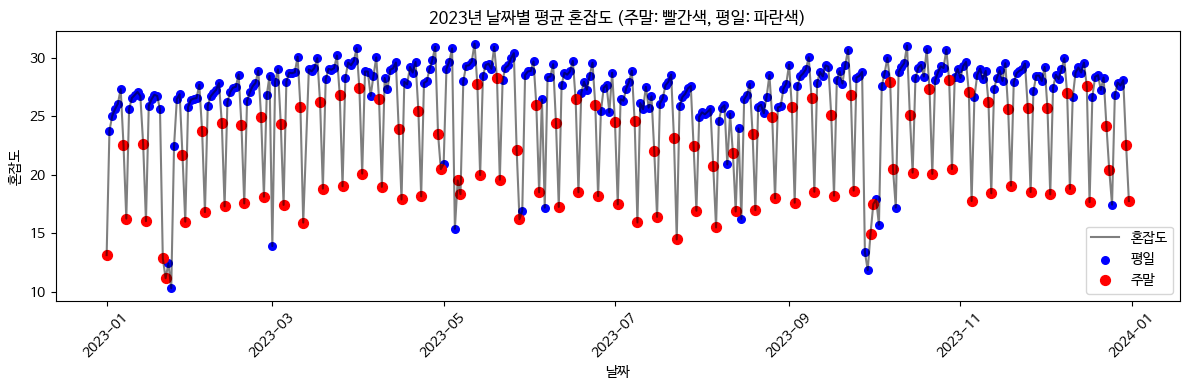

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df['날짜'] = pd.to_datetime(df['날짜'])
df_2023 = df[df['날짜'].dt.year == 2023]
daily_mean = df_2023.groupby(df_2023['날짜'].dt.date)['혼잡도'].mean().reset_index()
daily_mean.columns = ['날짜', '혼잡도']
daily_mean['요일'] = pd.to_datetime(daily_mean['날짜']).dt.weekday
is_weekend = daily_mean['요일'] >= 5
plt.figure(figsize=(12,4))


plt.plot(daily_mean['날짜'], daily_mean['혼잡도'], color='black', linestyle='-', alpha=0.5, label='혼잡도')
plt.scatter(daily_mean.loc[~is_weekend, '날짜'],
            daily_mean.loc[~is_weekend, '혼잡도'],
            color='blue', label='평일', s=30)
plt.scatter(daily_mean.loc[is_weekend, '날짜'],
            daily_mean.loc[is_weekend, '혼잡도'],
            color='red', label='주말', s=50)

plt.title('2023년 날짜별 평균 혼잡도 (주말: 빨간색, 평일: 파란색)')
plt.xlabel('날짜')
plt.ylabel('혼잡도')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['혼잡도'], model='additive', period=22*7*30)

# 결과 시각화
result.plot()
plt.show()

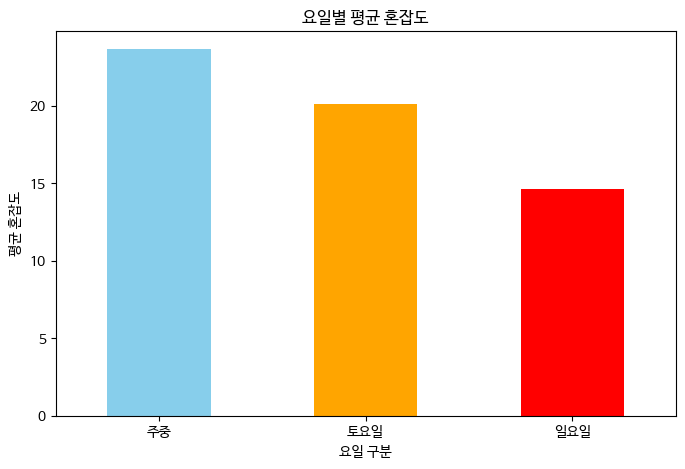

In [ ]:
def day_type(day):
    if day < 5:
        return '주중'
    elif day == 5:
        return '토요일'
    else:
        return '일요일'

df['요일구분'] = df['요일'].apply(day_type)

# 요일구분 별 평균 혼잡도 계산
mean_congestion = df.groupby('요일구분')['혼잡도'].mean().reindex(['주중', '토요일', '일요일'])

plt.figure(figsize=(8,5))
mean_congestion.plot(kind='bar', color=['skyblue', 'orange', 'red'])
plt.title('요일별 평균 혼잡도')
plt.xlabel('요일 구분')
plt.ylabel('평균 혼잡도')
plt.xticks(rotation=0)
plt.show()